# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | matamoros
Processing Record 3 of Set 1 | ulladulla
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | palmeirais
Processing Record 6 of Set 1 | nola
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | sibolga
Processing Record 10 of Set 1 | varkkallai
Processing Record 11 of Set 1 | nouadhibou
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cam ranh
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | carutapera
Processing Record 18 of Set 1 | ambon
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | nizhneyansk
City not found. Skipping...
Proce

Processing Record 36 of Set 4 | le moule
Processing Record 37 of Set 4 | sfantu gheorghe
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | kuche
City not found. Skipping...
Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | atambua
Processing Record 45 of Set 4 | burnie
Processing Record 46 of Set 4 | pathein
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | ossora
Processing Record 0 of Set 5 | beringovskiy
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | mairang
Processing Record 4 of Set 5 | rundu
Processing Record 5 of Set 5 | viedma
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | maldonado
Processing Record 8 of Set 5 | sayyan
Pro

Processing Record 25 of Set 8 | andrews
Processing Record 26 of Set 8 | pastavy
Processing Record 27 of Set 8 | naron
Processing Record 28 of Set 8 | seydi
Processing Record 29 of Set 8 | beaverlodge
Processing Record 30 of Set 8 | omboue
Processing Record 31 of Set 8 | matay
Processing Record 32 of Set 8 | roald
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | marienburg
Processing Record 35 of Set 8 | nishihara
Processing Record 36 of Set 8 | marrakesh
Processing Record 37 of Set 8 | evensk
Processing Record 38 of Set 8 | haibowan
City not found. Skipping...
Processing Record 39 of Set 8 | narsaq
Processing Record 40 of Set 8 | los alamos
Processing Record 41 of Set 8 | puerto varas
Processing Record 42 of Set 8 | high level
Processing Record 43 of Set 8 | kangaatsiaq
Processing Record 44 of Set 8 | roma
Processing Record 45 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 46 of Set 8 | creel
Processing Record 47 of Set 8 | batemans bay
Processin

Processing Record 11 of Set 12 | campbell river
Processing Record 12 of Set 12 | camden
Processing Record 13 of Set 12 | sale
Processing Record 14 of Set 12 | wonthaggi
Processing Record 15 of Set 12 | derzhavinsk
Processing Record 16 of Set 12 | teya
Processing Record 17 of Set 12 | port hueneme
Processing Record 18 of Set 12 | araouane
Processing Record 19 of Set 12 | ocos
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | dongsheng
Processing Record 22 of Set 12 | goure
Processing Record 23 of Set 12 | ipatovo
Processing Record 24 of Set 12 | boyolangu
Processing Record 25 of Set 12 | ulaanbaatar
Processing Record 26 of Set 12 | rocha
Processing Record 27 of Set 12 | shimoda
Processing Record 28 of Set 12 | pointe michel
Processing Record 29 of Set 12 | chara
Processing Record 30 of Set 12 | biltine
Processing Record 31 of Set 12 | hazorasp
Processing Record 32 of Set 12 | ludvika
Processing Record 33 of Set 12 | eskasem
City not found. Skipping...
Proc

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,16.54,84,1,10.28,PT,1674437030
1,matamoros,25.5333,-103.2500,18.06,16,0,0.00,MX,1674437030
2,ulladulla,-35.3500,150.4667,21.79,65,49,4.49,AU,1674436838
3,butaritari,3.0707,172.7902,27.12,75,92,5.56,KI,1674437031
4,palmeirais,-5.9778,-43.0633,24.60,79,11,0.98,BR,1674437032


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,16.54,84,1,10.28,PT,1674437030
1,matamoros,25.5333,-103.2500,18.06,16,0,0.00,MX,1674437030
2,ulladulla,-35.3500,150.4667,21.79,65,49,4.49,AU,1674436838
3,butaritari,3.0707,172.7902,27.12,75,92,5.56,KI,1674437031
4,palmeirais,-5.9778,-43.0633,24.60,79,11,0.98,BR,1674437032


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

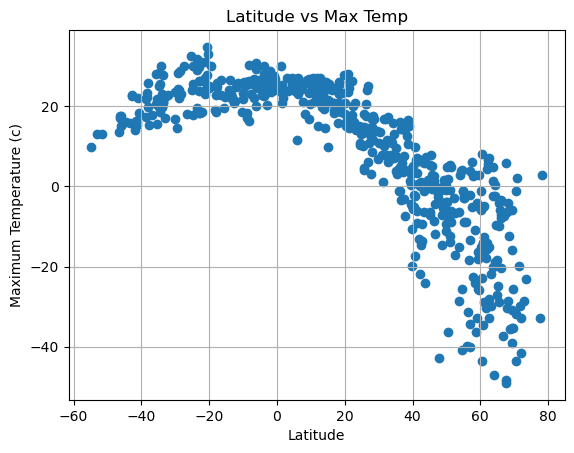

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (c)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

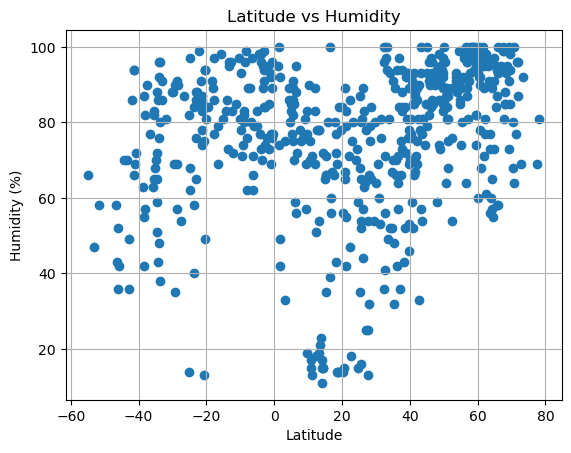

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

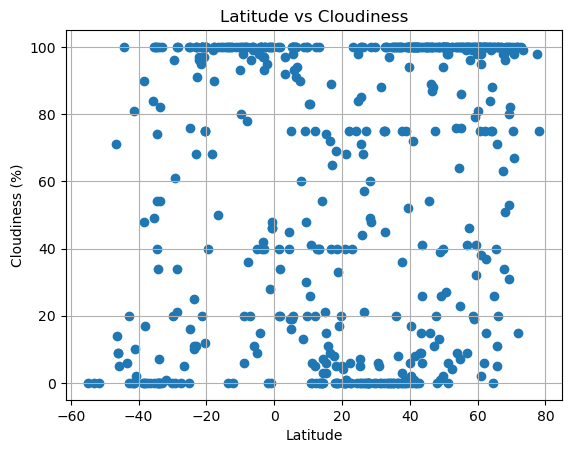

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

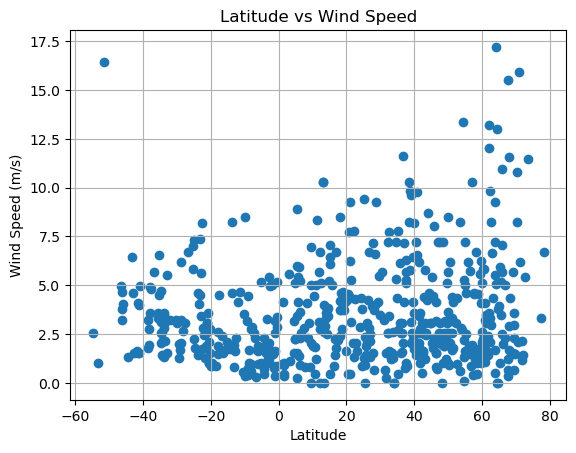

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def lin_regress(lat,values,y,hemisphere):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(lat,values)
    regress_values = lat * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-value is: {rvalue}")

    xpos=(max(lat) + min(lat))/2
    
    plt.scatter(lat,values)
    plt.plot(lat,regress_values,"r-")
    plt.annotate(line_eq,(xpos,min(values)),fontsize=14,color="red",ha= 'center')
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.title(f'Latitude vs {y} for {hemisphere}')
    plt.show()


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,16.54,84,1,10.28,PT,1674437030
1,matamoros,25.5333,-103.2500,18.06,16,0,0.00,MX,1674437030
3,butaritari,3.0707,172.7902,27.12,75,92,5.56,KI,1674437031
5,nola,40.9220,14.5329,6.63,85,100,1.47,IT,1674437032
8,sibolga,1.7427,98.7792,24.38,92,100,0.33,ID,1674437033


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ulladulla,-35.3500,150.4667,21.79,65,49,4.49,AU,1674436838
4,palmeirais,-5.9778,-43.0633,24.60,79,11,0.98,BR,1674437032
6,arraial do cabo,-22.9661,-42.0278,23.77,88,100,5.63,BR,1674437032
7,rikitea,-23.1203,-134.9692,26.36,76,11,7.36,PF,1674437033
11,bluff,-46.6000,168.3333,13.63,58,71,4.96,NZ,1674437035


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8405750338876683


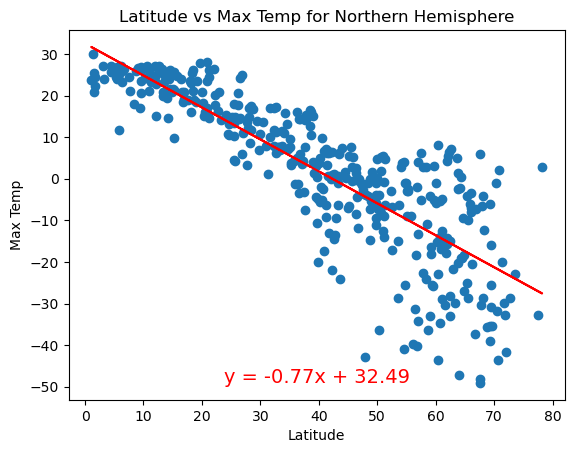

In [83]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp","Northern Hemisphere")

The r-value is: 0.48301099443042406


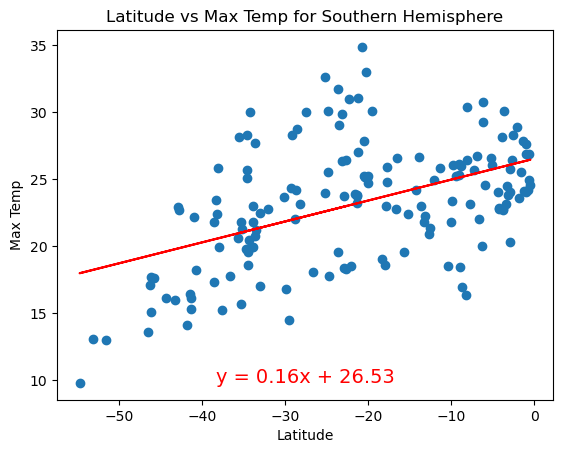

In [84]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp","Southern Hemisphere")

**Discussion about the linear relationship:** 
In the northern hemisphere, there appears to be a strong correlation between the Latitude of a city and the maximum temperature. The is shown by the R Value being relatively close to 1 (0.84 on my test). This means that the close you are to the equator, the maximum temoperature increases accordingly. On the Southern hemsiphere, there is not as strong of a correlation, however there is still a trend present. It it likely that because there more land area, and a higher population of people in the northern hemisphere, the data is better scaled evenly across the different degrees of latitude. Especially note that there is up to 80 degrees on the northern hemisphere, vs only -50 on the southern

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44943798130179463


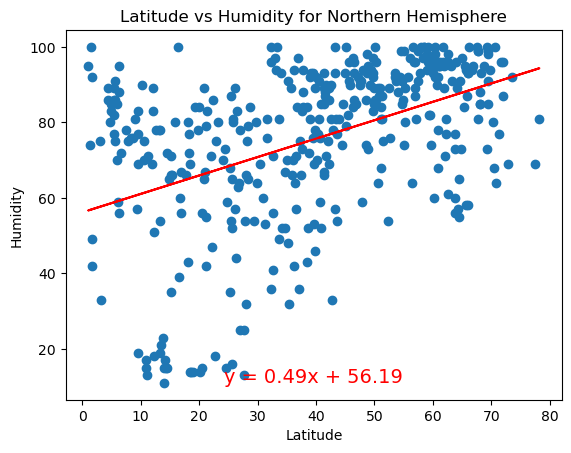

In [85]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity","Northern Hemisphere")

The r-value is: 0.425102963978465


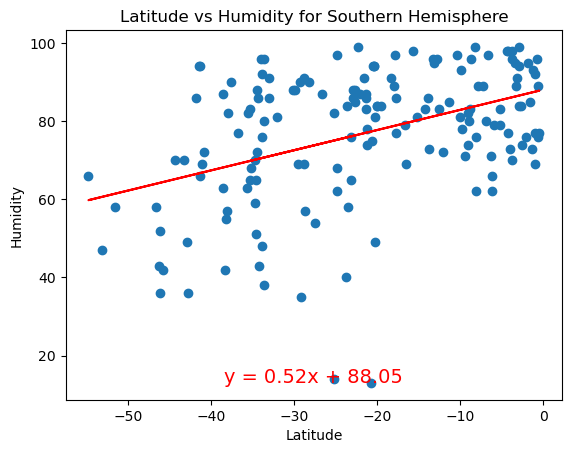

In [86]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity","Southern Hemisphere")

**Discussion about the linear relationship:** 
The trends of the two graphs show that there is somewhat of a correlation in the northern hemisphere that the further away the city is from the equator, the higher the humidity levels are. In the southern hemisphere, the data is showing the oposite trend. Due to the r-values both being less than 0.5, I'd conclude that we cannot draw a comprehensive conlcusion on the data, as it is not clear enough.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.33183951780942045


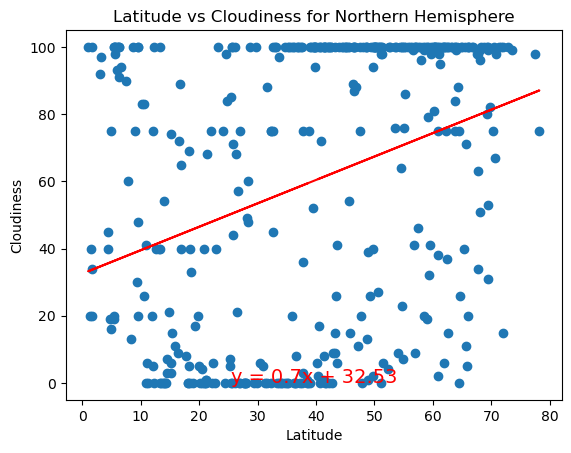

In [87]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness","Northern Hemisphere")

The r-value is: 0.44125339329265334


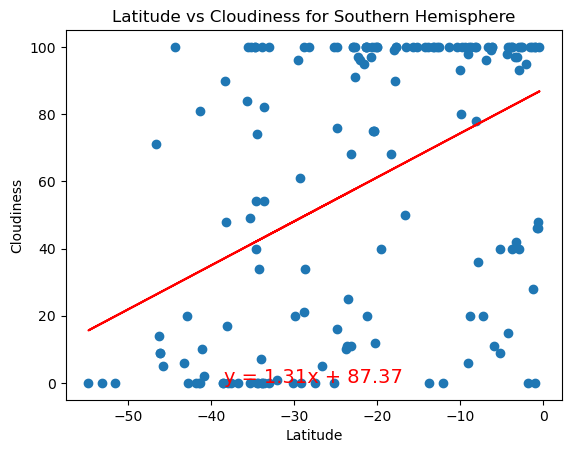

In [88]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness","Southern Hemisphere")

**Discussion about the linear relationship:** 
There seems to be little correlation of cloudiness and latitude of a city in neither the northern or southern hemisphere. The data gathered is not very useful, especially because this information would change too regularly. It would be better to gather whether or not the city is currently in it's "wet season"

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11338747136723759


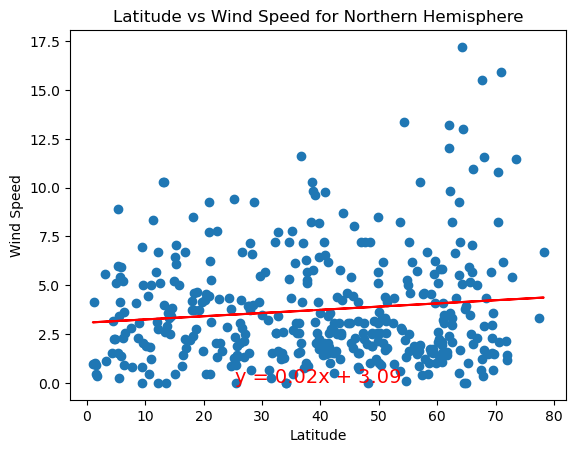

In [89]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed","Northern Hemisphere")

The r-value is: -0.29440238335898006


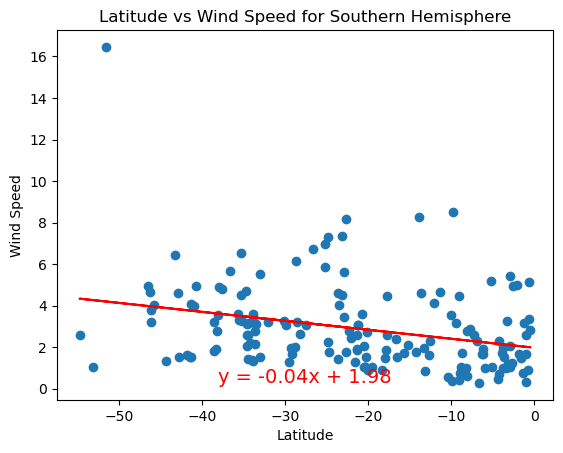

In [90]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed","Southern Hemisphere")

**Discussion about the linear relationship:** 
This data also shows little to no relationship between the wind speed and the hemisphere of the city. The r value backs this up and i would suggest that the wind speed is not related to the latitude at all